<a href="https://colab.research.google.com/github/Kashishkewat/machine-learning/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Lasso Regression**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

array([28.45290284])

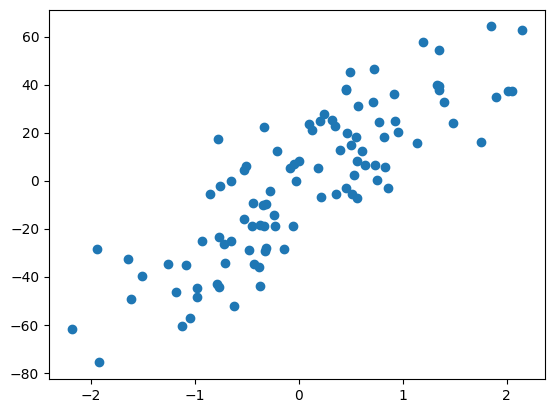

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.coef_


In [3]:
reg.intercept_


np.float64(-1.4449417876447654)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+04, tolerance: 8.133e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

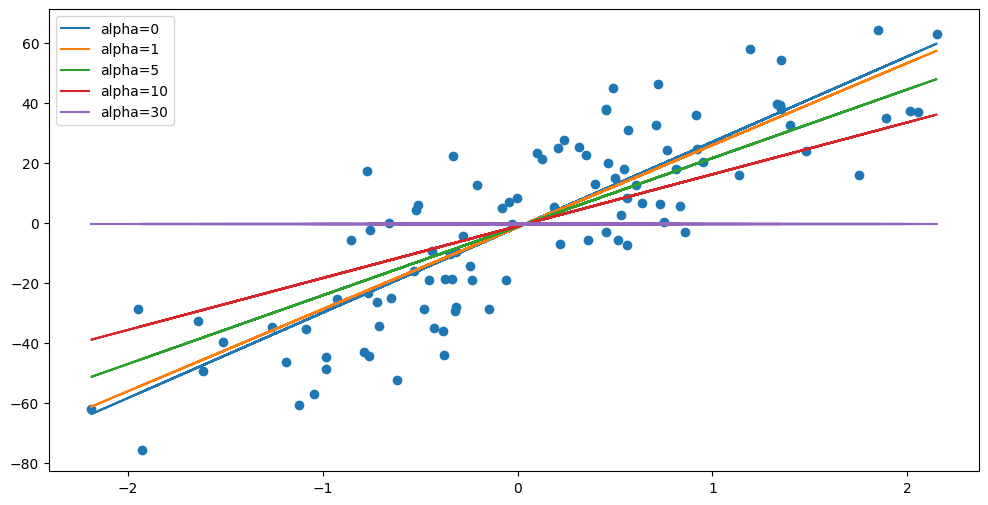

In [4]:
alphas=[0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
  l=Lasso(alpha=i)
  l.fit(X_train,y_train)
  plt.plot(X_train,l.predict(X_train),label='alpha={}'.format(i))
plt.legend()
plt.show()

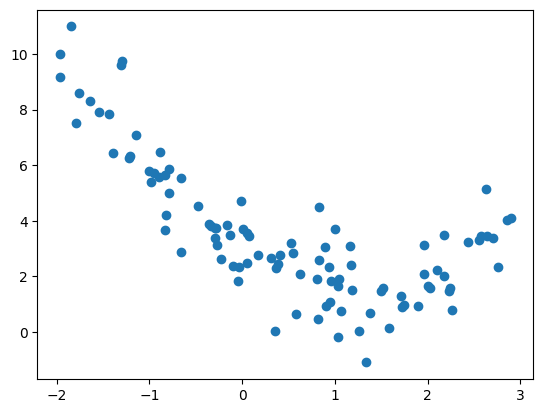

In [5]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7 * x1 ** 2 - 2 *x1 + 3 + np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

# **1.how are coefficients affected?**

In [6]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score as r2_score_func # Alias the r2_score function
from sklearn.model_selection import train_test_split

In [7]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
X_train , X_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [9]:
coefs = []
r2_scores_list = []

for i in [0, 0.1, 1, 10]:
  reg = Lasso(alpha=i, max_iter=10000)
  reg.fit(X_train, y_train)
  coefs.append(reg.coef_)
  y_pred = reg.predict(X_test)
  r2_scores_list.append(r2_score_func(y_test, y_pred)) # Use the aliased function

print("Coefficients for different alphas:", coefs)
print("R2 Scores for different alphas:", r2_scores_list)

Coefficients for different alphas: [array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238]), array([   0.        , -113.96992829,  526.74439601,  292.62847198,
        -82.69368149,   -0.        , -152.68533835,    0.        ,
        551.08029055,    7.17099207]), array([  0.        ,   0.        , 363.88574216,  27.27316304,
         0.        ,   0.        ,  -0.        ,   0.        ,
       336.137262  ,   0.        ]), array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])]
R2 Scores for different alphas: [0.43993386615689656, 0.4334618007658305, 0.3256808253711555, -0.012517603619692785]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

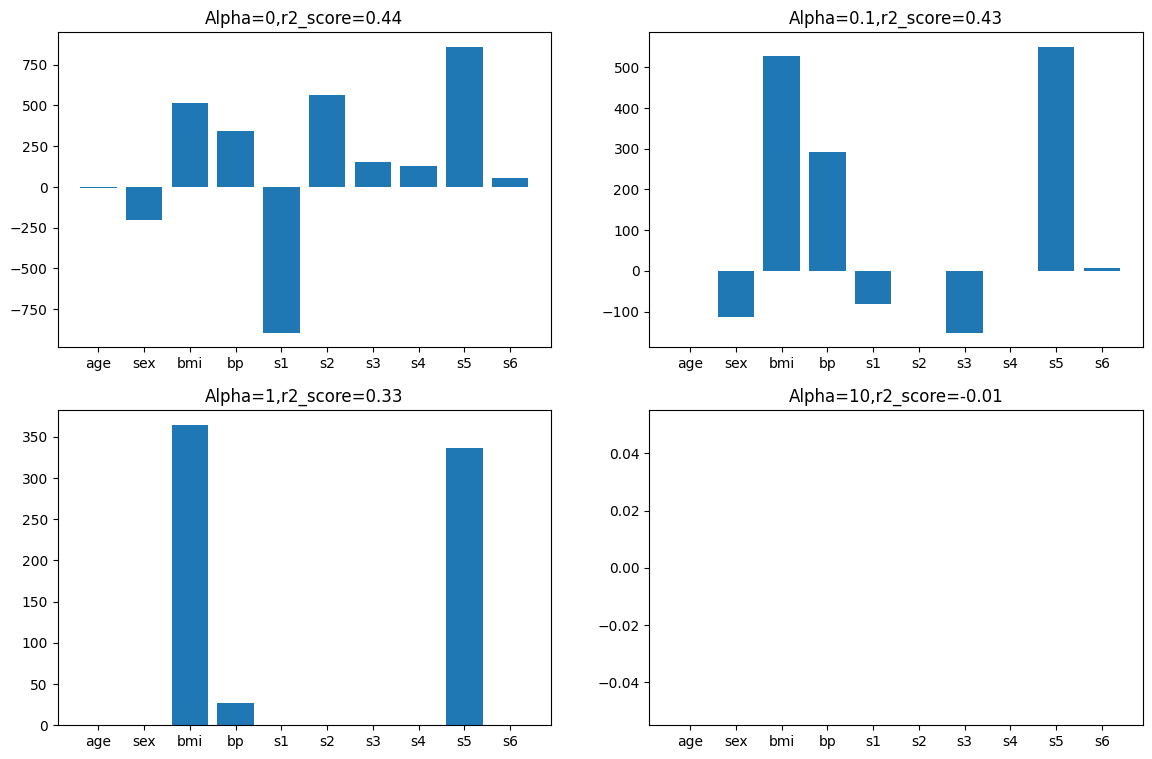

In [11]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0]) # Corrected to feature_names
plt.title('Alpha=0,r2_score={}'.format(round(r2_scores_list[0],2))) # Corrected to r2_scores_list

plt.subplot(222)
plt.bar(data.feature_names,coefs[1]) # Corrected to feature_names
plt.title('Alpha=0.1,r2_score={}'.format(round(r2_scores_list[1],2))) # Corrected to r2_scores_list

plt.subplot(223)
plt.bar(data.feature_names,coefs[2]) # Corrected to feature_names
plt.title('Alpha=1,r2_score={}'.format(round(r2_scores_list[2],2))) # Corrected to r2_scores_list

plt.subplot(224)
plt.bar(data.feature_names,coefs[3]) # Corrected to feature_names
plt.title('Alpha=10,r2_score={}'.format(round(r2_scores_list[3],2))) # Corrected to r2_scores_list

plt.show()

# **2. Higher Coefficients are affected more**

In [12]:
alphas=[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs=[]
for i in alphas:
  reg=Lasso(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [13]:
input_array=np.array(coefs)
coef_df=pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [14]:
alphas=[0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs=[]
for i in alphas:
  reg=Lasso(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

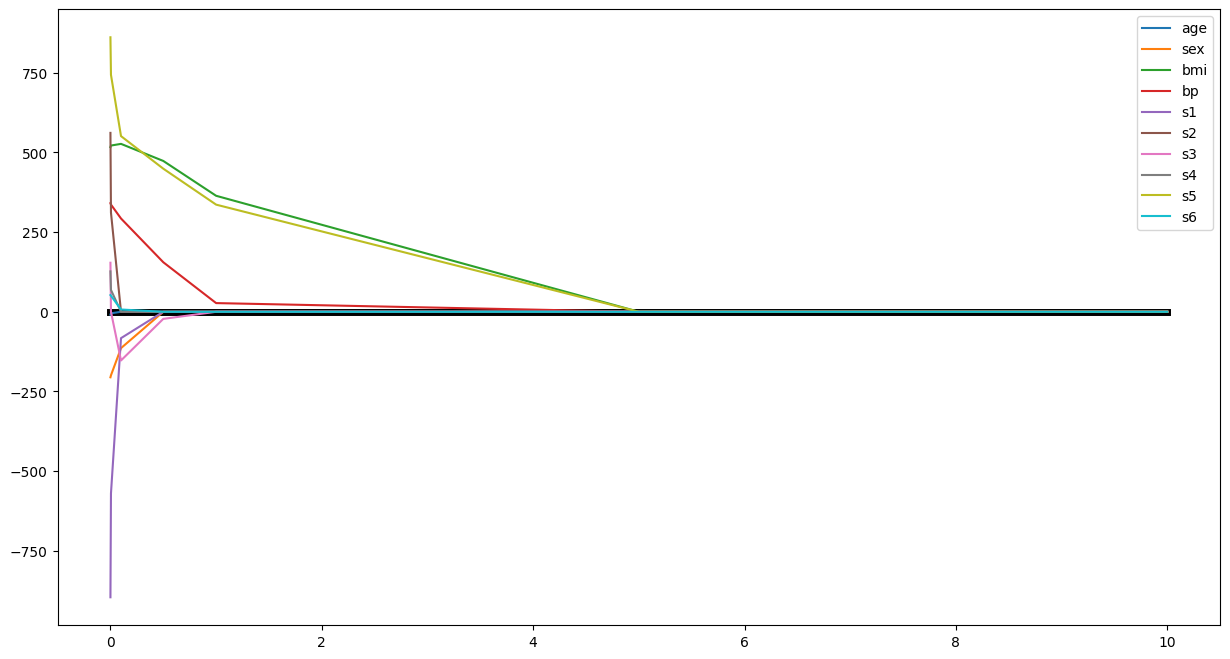

In [15]:
input_array=np.array(coefs).T
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
  plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

# **3. Impact on bias and variance**

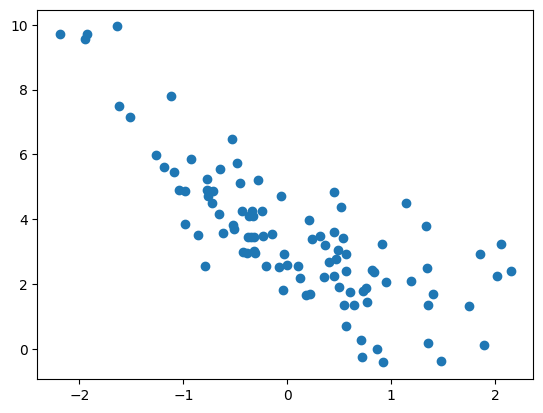

In [16]:
m=100
x=5*np.random.rand(m,1)-2
y=0.7*X**2-2*X+3+np.random.randn(m,1)
plt.scatter(X,y)
plt.show()

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [20]:
from mlxtend.evaluate import bias_variance_decomp
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
variance=[]
for i in alphas:
  reg=Lasso(alpha=i)
  avg_exected_loss,avg_bias,avg_variance=bias_variance_decomp(reg,X_train_poly,y_train,X_test,y_test,loss='mse',random_seed=123)
  loss.append(avg_exected_loss)
  bias.append(avg_bias)
  variance.append(avg_variance)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.238e+01, tolerance: 3.686e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

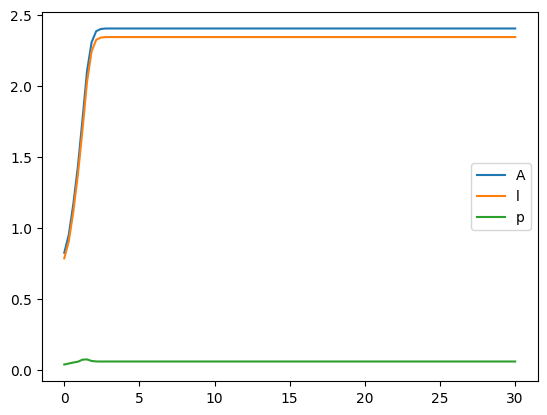

In [21]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend('Alpha')
plt.show()

# **4.Effect of Regularization on loss **

np.float64(-2.29474455867698)

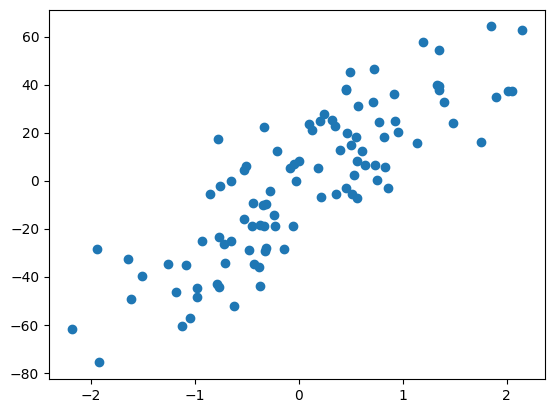

In [22]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
reg.coef_
reg.intercept_

In [23]:
def cal_loss(m,alpha):
  return np.sum((y-m*X.ravel()+2.29)**2) +alpha*abs(m)

In [24]:
def predict(m):
  return m*X - 2.29


<function matplotlib.pyplot.show(close=None, block=None)>

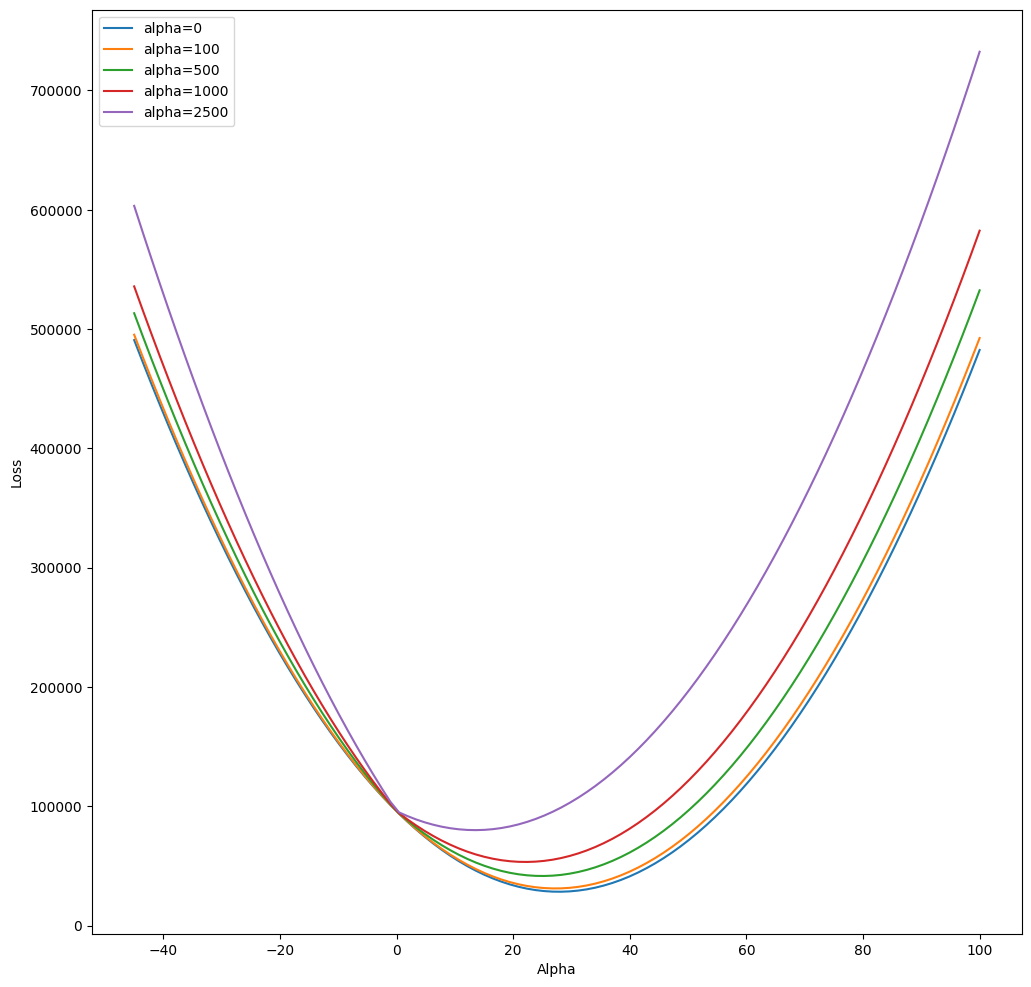

In [27]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in[0,100,500,1000,2500]:
  loss=[]
  for i in range(m.shape[0]):
    loss_i=cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label='alpha={}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show